In [1]:
library(rdmc)
library(tidyverse)
library(vroom)
library(ggforce)
library(cowplot)
library(patchwork)
library(brms)
library(MaizePal)
theme_set(cowplot::theme_cowplot(font_size = 12))
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

Loading required package: MASS

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: purrr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: rlang


Attaching package: ‘rlang’


The following object is masked from ‘package:magrittr’:

    set_names


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice


── Attaching packages ───────────────────────────────

# Diversity

In [3]:
source("../color_df.R")

all_files = list.files(path = "../data/angsd_pi", full.names = TRUE)
pi_files = all_files[grep(pattern = "100000BP_theta.txt", all_files)]

pi_df <- 
pi_files %>% 
    map_df(~{
       vroom(.x, delim = "\t", col_names = TRUE) %>% 
        filter(nSites > 100000 * 0.1) %>% 
        #filter(nSites > 1000 * 0.5) %>% 
        mutate(
            pi = tP/nSites,
            pop = str_replace(string = .x, pattern = "../data/angsd_pi/", replacement = ""),
            pop = str_replace(string = pop, pattern = ".100000BP_theta.txt", replacement = ""),
            pop = str_replace(string = pop, pattern = ".1000BP_theta.txt", replacement = ""),
            pop = str_replace(string = pop, pattern = ".1000000BP_theta.txt", replacement = ""),
            ) 
    }) %>% 
    separate(col = pop, into = c("ref", "subspecies", "pop"), sep = "--") %>% 
    mutate(pop = str_replace(pop, "LR_|Teo_", "")) %>%
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop") %>% 
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    mutate(pop = str_replace_all(pop, "_", " "))
    


Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: #(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop), Chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` arg

In [4]:
bps <- 50000

stat_files <- list.files(path = "../data/mushi/", pattern = "..*stats.txt", full.names = TRUE)

msstats <-
stat_files %>% 
map_df(~{
    vroom::vroom(
    .x, 
    delim = "\t", col_names = FALSE) %>% 
    set_colnames(c("pi", "Tajima", "pop"))
}) %>% 
    group_by(pop) %>% 
    summarise(pi = mean(pi), Tajima = mean(Tajima)) %>% 
    mutate(ssp_pop = pop) %>% 
    separate(pop, c("subspecies", "pop"), sep = "--") %>% 
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    mutate(pop = str_replace_all(pop, "_", " ")) 

head(pi_df)

Rows: 1,000
Columns: 3
Delimiter: "\t"
chr [1]: X3
dbl [2]: X1, X2

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,000
Columns: 3
Delimiter: "\t"
chr [1]: X3
dbl [2]: X1, X2

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,000
Columns: 3
Delimiter: "\t"
chr [1]: X3
dbl [2]: X1, X2

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,000
Columns: 3
Delimiter: "\t"
chr [1]: X3
dbl [2]: X1, X2

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,000
Columns: 3
Delimiter: "\t"
chr [1]: X3
dbl [2]: X1, X2

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,00

"#(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop)",Chr,WinCenter,tW,tP,tF,tH,tL,Tajima,fuf,fud,fayh,zeng,nSites,pi,ref,subspecies,pop,color
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
"(17958,32655)(103540,214609)(100000,200000)",chr3,150000,87.41677,60.60983,148.7106,25.90988,43.25985,-1.278275,-1.817797,-1.577290,0.394977,-0.551770,14697,0.004123959,v5,LR,Amatlan de Canas,cornflowerblue
"(17958,32655)(103540,214609)(100000,200000)",chr3,150000,87.41677,60.60983,148.7106,25.90988,43.25985,-1.278275,-1.817797,-1.577290,0.394977,-0.551770,14697,0.004123959,v5,LR,Amatlan de Canas,cornflowerblue
"(32655,50069)(214609,309084)(200000,300000)",chr3,250000,81.06601,65.63722,124.1083,26.98269,46.30996,-0.792914,-1.299270,-1.192593,0.474342,-0.468106,17414,0.003769221,v5,LR,Amatlan de Canas,cornflowerblue
"(32655,50069)(214609,309084)(200000,300000)",chr3,250000,81.06601,65.63722,124.1083,26.98269,46.30996,-0.792914,-1.299270,-1.192593,0.474342,-0.468106,17414,0.003769221,v5,LR,Amatlan de Canas,cornflowerblue
"(50069,77725)(309084,400000)(300000,400000)",chr3,350000,149.03801,112.62050,242.4822,52.22603,82.42326,-1.021522,-1.582489,-1.421759,0.403746,-0.489432,27656,0.004072191,v5,LR,Amatlan de Canas,cornflowerblue
"(50069,77725)(309084,400000)(300000,400000)",chr3,350000,149.03801,112.62050,242.4822,52.22603,82.42326,-1.021522,-1.582489,-1.421759,0.403746,-0.489432,27656,0.004072191,v5,LR,Amatlan de Canas,cornflowerblue


`summarise()` regrouping output by 'subspecies' (override with `.groups` argument)



subspecies,pop,median_pi,q25,q75,median_td,a,b
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LR,Amatlan de Canas,0.006585440,0.004959323,0.007960766,-0.3713455,1.327891,0.8272369
LR,Crucero Lagunitas,0.006660402,0.005044513,0.008029264,0.0328095,1.320326,0.8295159
LR,Los Guajes,0.006201312,0.004534465,0.007602594,-0.1912500,1.367595,0.8156837
LR,random,0.006771140,0.005085321,0.008187814,-0.4070980,1.331507,0.8269777
LR,random1 Palmar Chico,0.006246098,0.004559535,0.007678498,-0.2366180,1.369898,0.8134531
LR,San Lorenzo,0.006717838,0.005068430,0.008156849,-0.3790630,1.325428,0.8235825
Teo,Amatlan de Canas,0.007899884,0.006483953,0.009231800,0.2584235,1.218375,0.8557252
Teo,Crucero Lagunitas,0.008040512,0.006544262,0.009473007,0.1145400,1.228635,0.8487814
Teo,El Rodeo,0.007303471,0.005832581,0.008730133,0.4080615,1.252185,0.8365818


[1] -0.3348031

[1] -0.1858747

pop,color
<chr>,<chr>
Amatlan de Canas,cornflowerblue
Amatlan de Canas,cornflowerblue
Crucero Lagunitas,gold
Crucero Lagunitas,gold
El Rodeo,darkorange
El Rodeo,darkorange
Los Guajes,mediumaquamarine
Los Guajes,mediumaquamarine
random1 Palmar Chico,violetred


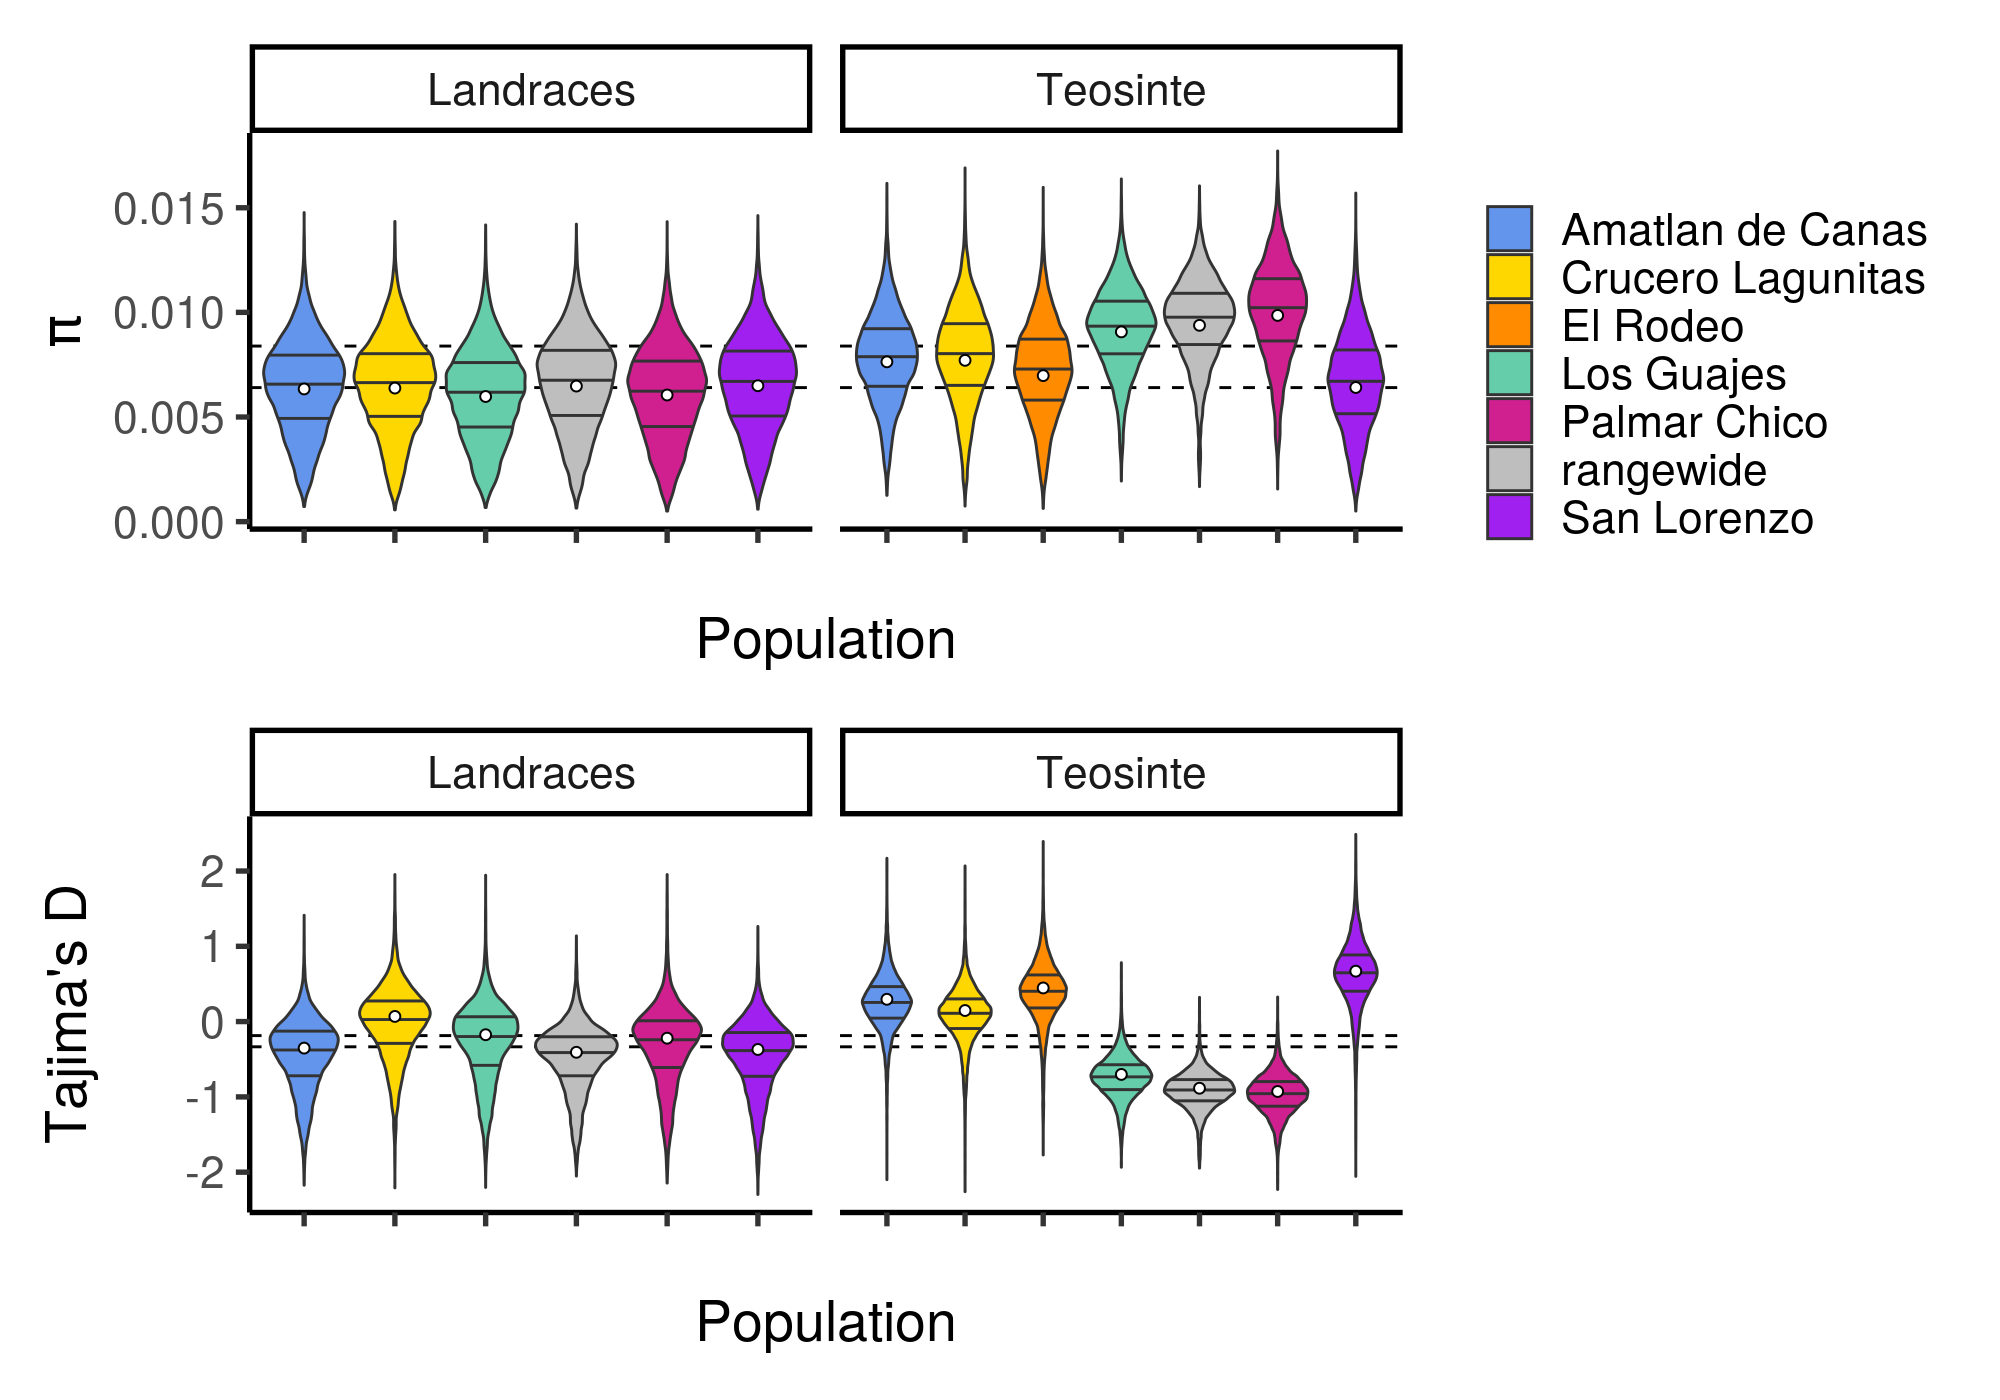

In [15]:
leg_df <- 
color_df %>% 
    mutate(pop = str_replace(pop, "LR_|Teo_", "")) %>% 
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    mutate(pop = str_replace_all(pop, "_", " ")) %>% 
    mutate(pop = ifelse(pop == "random", "rangewide", pop)) %>% 
    arrange(pop)

piplot <- 
pi_df %>% 
drop_na() %>% 
ggplot(aes(x = pop, y = pi, fill = color)) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "LR")$pi), lty = 2) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "Teo")$pi), lty = 2) +
    #geom_boxplot(outlier.shape = NA) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
    geom_point(data = msstats, aes(pop, pi), inherit.aes = FALSE, shape = 21, bg = "white") +
    facet_wrap(~subspecies, scales = "free_x", labeller = labeller(subspecies = c("LR" = "Landraces", "Teo" = "Teosinte"))) +
    scale_fill_identity(guide = "legend", labels = str_remove_all(leg_df$pop, "random1 "), breaks = leg_df$color) +
    labs(fill = "") +
    theme(axis.text.x=element_text(angle = 90, hjust = 1)) +
    ylab(expression(pi)) +
    xlab("\nPopulation")

tdplot <- 
pi_df %>% 
ggplot(aes(x = pop, y = Tajima, fill = color)) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "LR")$Tajima), lty = 2) +
    geom_hline(yintercept = mean(filter(pi_df, subspecies == "Teo")$Tajima), lty = 2) +
    #geom_boxplot(outlier.shape = NA) +
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
    geom_point(data = msstats, aes(pop, Tajima), inherit.aes = FALSE, shape = 21, bg = "white") +
    facet_wrap(~subspecies, scales = "free_x", labeller = labeller(subspecies = c("LR" = "Landraces", "Teo" = "Teosinte"))) +
    scale_fill_identity() +
    theme(axis.text.x=element_text(angle = 90, hjust = 1)) +
    ylab("Tajima's D") +
    xlab("\nPopulation")
    


(piplot + theme_classic(base_size = 20) + theme(axis.text.x = element_blank())) / (tdplot +  theme_classic(base_size = 20) + theme(axis.text.x = element_blank()))

pi_df %>% 
    group_by(subspecies, pop) %>% 
    summarise(
        median_pi = median(pi), 
        q25 = quantile(pi, 0.25),  
        q75 = quantile(pi, 0.75), 
        median_td = median(Tajima))  %>% 
    mutate(a = median_pi / q25, b = median_pi/q75)


mean(filter(pi_df, subspecies == "LR")$Tajima)
mean(filter(pi_df, subspecies == "Teo")$Tajima)

leg_df

# Demography


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  T = col_double(),
  Ne = col_double(),
  pop = col_character()
)



── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  T = col_double(),
  Ne = col_double(),
  pop = col_character()
)



── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  T = col_double(),
  Ne = col_double(),
  pop = col_character()
)



── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  T = col_double(),
  Ne = col_double(),
  pop = col_character()
)



── Column specification ───────────────────────────────────

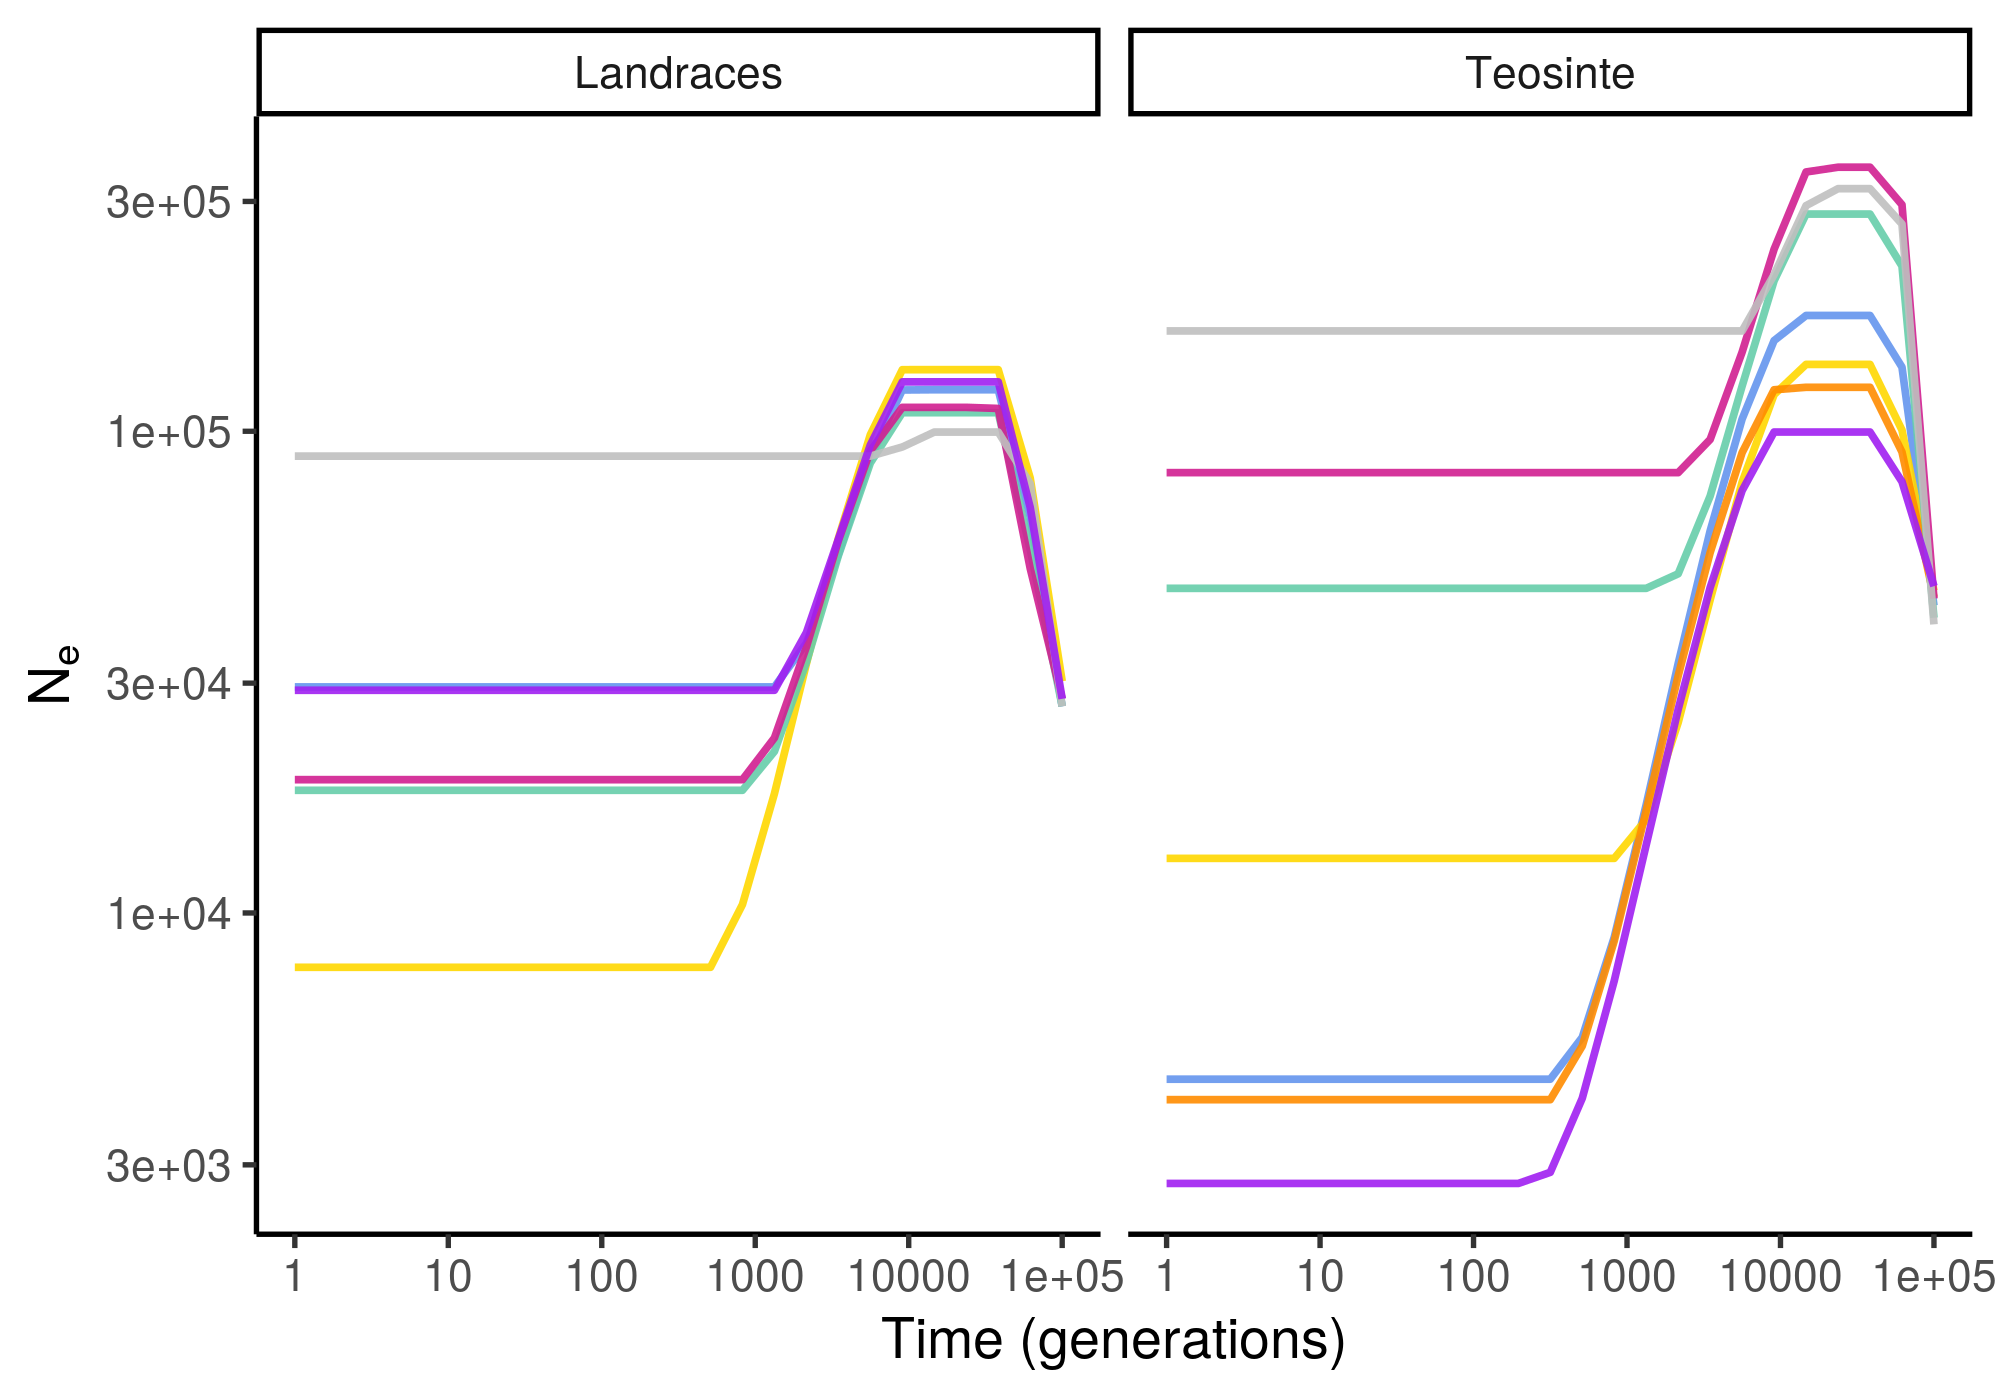

In [17]:
roundUp <- function(x, b = 10) b^ceiling(log(x, base = b))


dem_files <- list.files(path = "../data/mushi/", pattern = "*mushi_demography.txt", full.names = TRUE)
dem_df <- dem_files %>% 
    map_df(~{
        read_delim(.x, delim = "\t", col_names = c("T", "Ne", "pop"))
    }) %>% 
    separate(pop, into = c("ssp", "pop"), sep = "--") %>% 
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop")  %>% 
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    mutate(pop = str_replace_all(pop, "_", " "))  %>% 
    mutate(pop = ifelse(pop == "random", "rangewide", pop)) %>% 
    drop_na()

dem_plot <- 
dem_df %>%
    ggplot(aes(T, Ne, group = pop, colour = color)) +
    geom_line(lwd = 1.3, alpha = 0.9) +
    facet_wrap(~ssp, labeller = labeller(ssp = c("LR" = "Landraces", "Teo" = "Teosinte"))) +
    scale_color_identity() +
    scale_x_continuous(trans = 'log10', breaks = 10^(0:5), labels = 10^(0:5)) +
    scale_y_continuous(trans = 'log10') +
    xlab("Time (generations)") +
    ylab(expression(N[e]))

dem_plot + theme_classic(base_size = 20)

# Inbreeding

In [11]:
all_relate = list.files(path = "../data/ngsRelate/", full.names = TRUE)
related_files = all_relate[grep(pattern = ".ngsRelate.txt$", all_relate)]

 
relate_df <- 
related_files %>%
    map_df(~{
        ssp <- str_replace(.x, pattern = "(.+)(LR|Teo)--(.+).ngsRelate.txt", "\\2")
        pop <- str_replace(.x, pattern = "(.+)(LR|Teo)--(.+).ngsRelate.txt", "\\3")    
        vroom(.x, delim = "\t", col_names = TRUE) %>% 
        mutate(subspecies = ssp, pop = pop, ssp_pop = paste0(ssp, "--", pop))
    })

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 45
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,485
Columns: 33
Delimiter: "\t"
chr [ 1]: 2dsfs
dbl [32]: a, b, nSites, J9, J8, J7, J6, J5, J4, J3, J2, J1, rab, Fa, Fb, theta, inbred_rel...

Use `spec()` to

`summarise()` regrouping output by 'pop' (override with `.groups` argument)



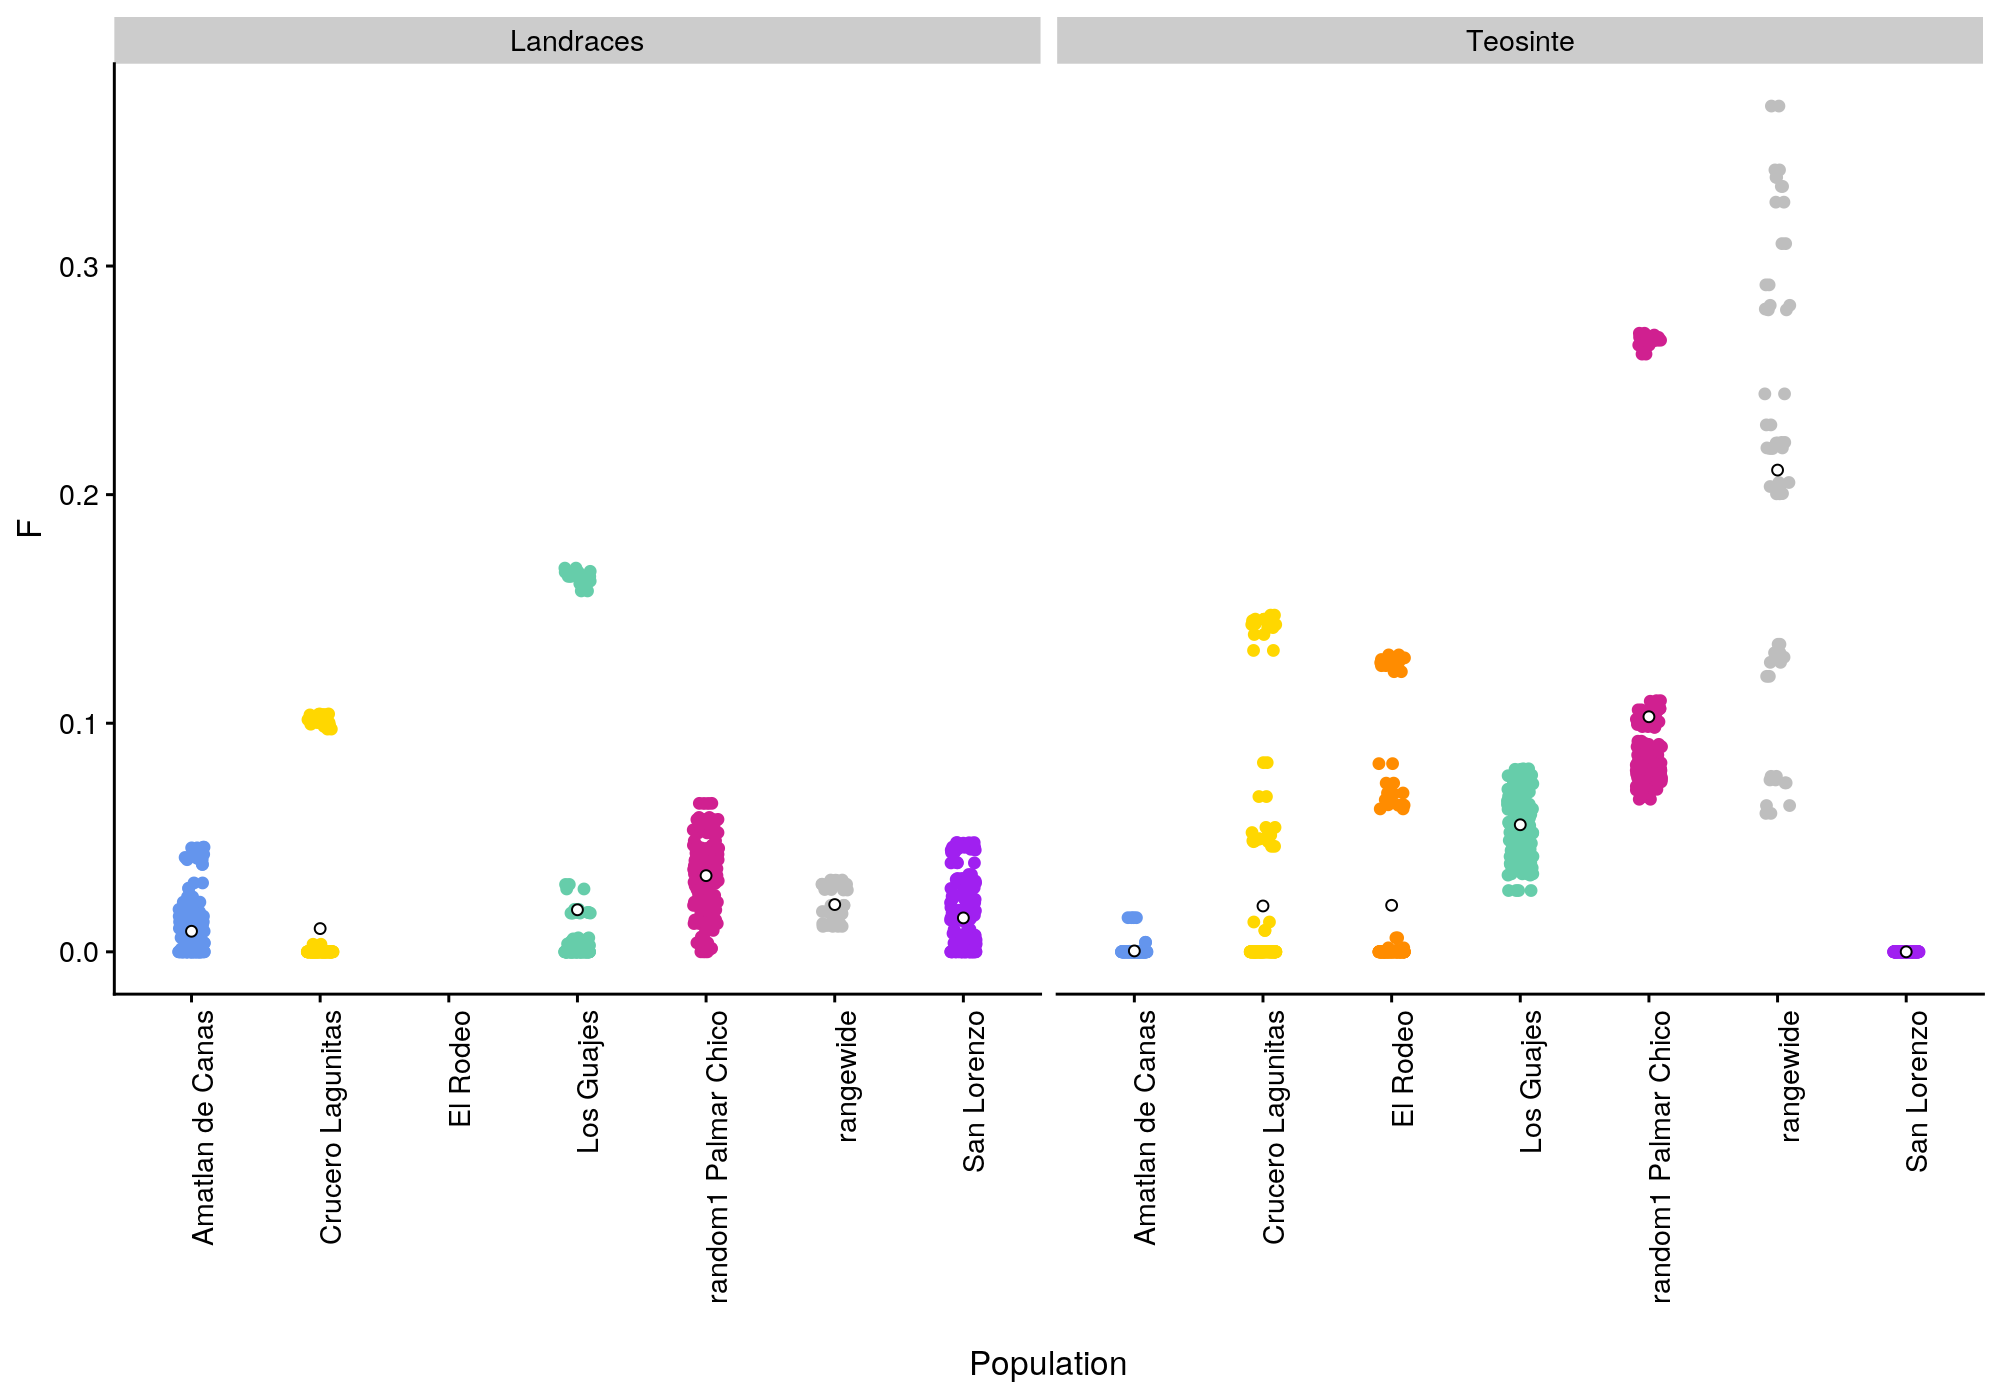

In [45]:
relate_plt_df <- 
relate_df %>%  
    pivot_longer(cols = c("Fa", "Fb"), names_to = "type", values_to = "F") %>% 
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop") %>% 
    separate(ssp_pop, sep = "--", into = c("ssp", "pop")) %>%
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    mutate(pop = str_replace_all(pop, "_", " ")) %>% 
    mutate(pop = ifelse(pop == "random", "rangewide", pop))

relate_summ <- 
    relate_plt_df %>%
    group_by(pop, ssp) %>% 
    summarise(mean_f = mean(F))


relate_plot <- 
    relate_plt_df %>% 
    ggplot(aes(pop, F, color = color)) +
    facet_wrap(~ssp, nrow = 1, labeller = labeller(ssp = c("LR" = "Landraces", "Teo" = "Teosinte"))) +
    geom_jitter(width = 0.1, height = 0) +
    geom_point(data = relate_summ, aes(pop, mean_f), shape = 21, bg = "white", inherit.aes = FALSE) + 
    theme(axis.text.x=element_text(angle = 90, hjust = 1)) +
    xlab("\nPopulation") + 
    scale_color_identity()
relate_plot



# Homozgosity By Descent (HBD)


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  chr = col_double(),
  pos = col_double(),
  cm = col_double()
)




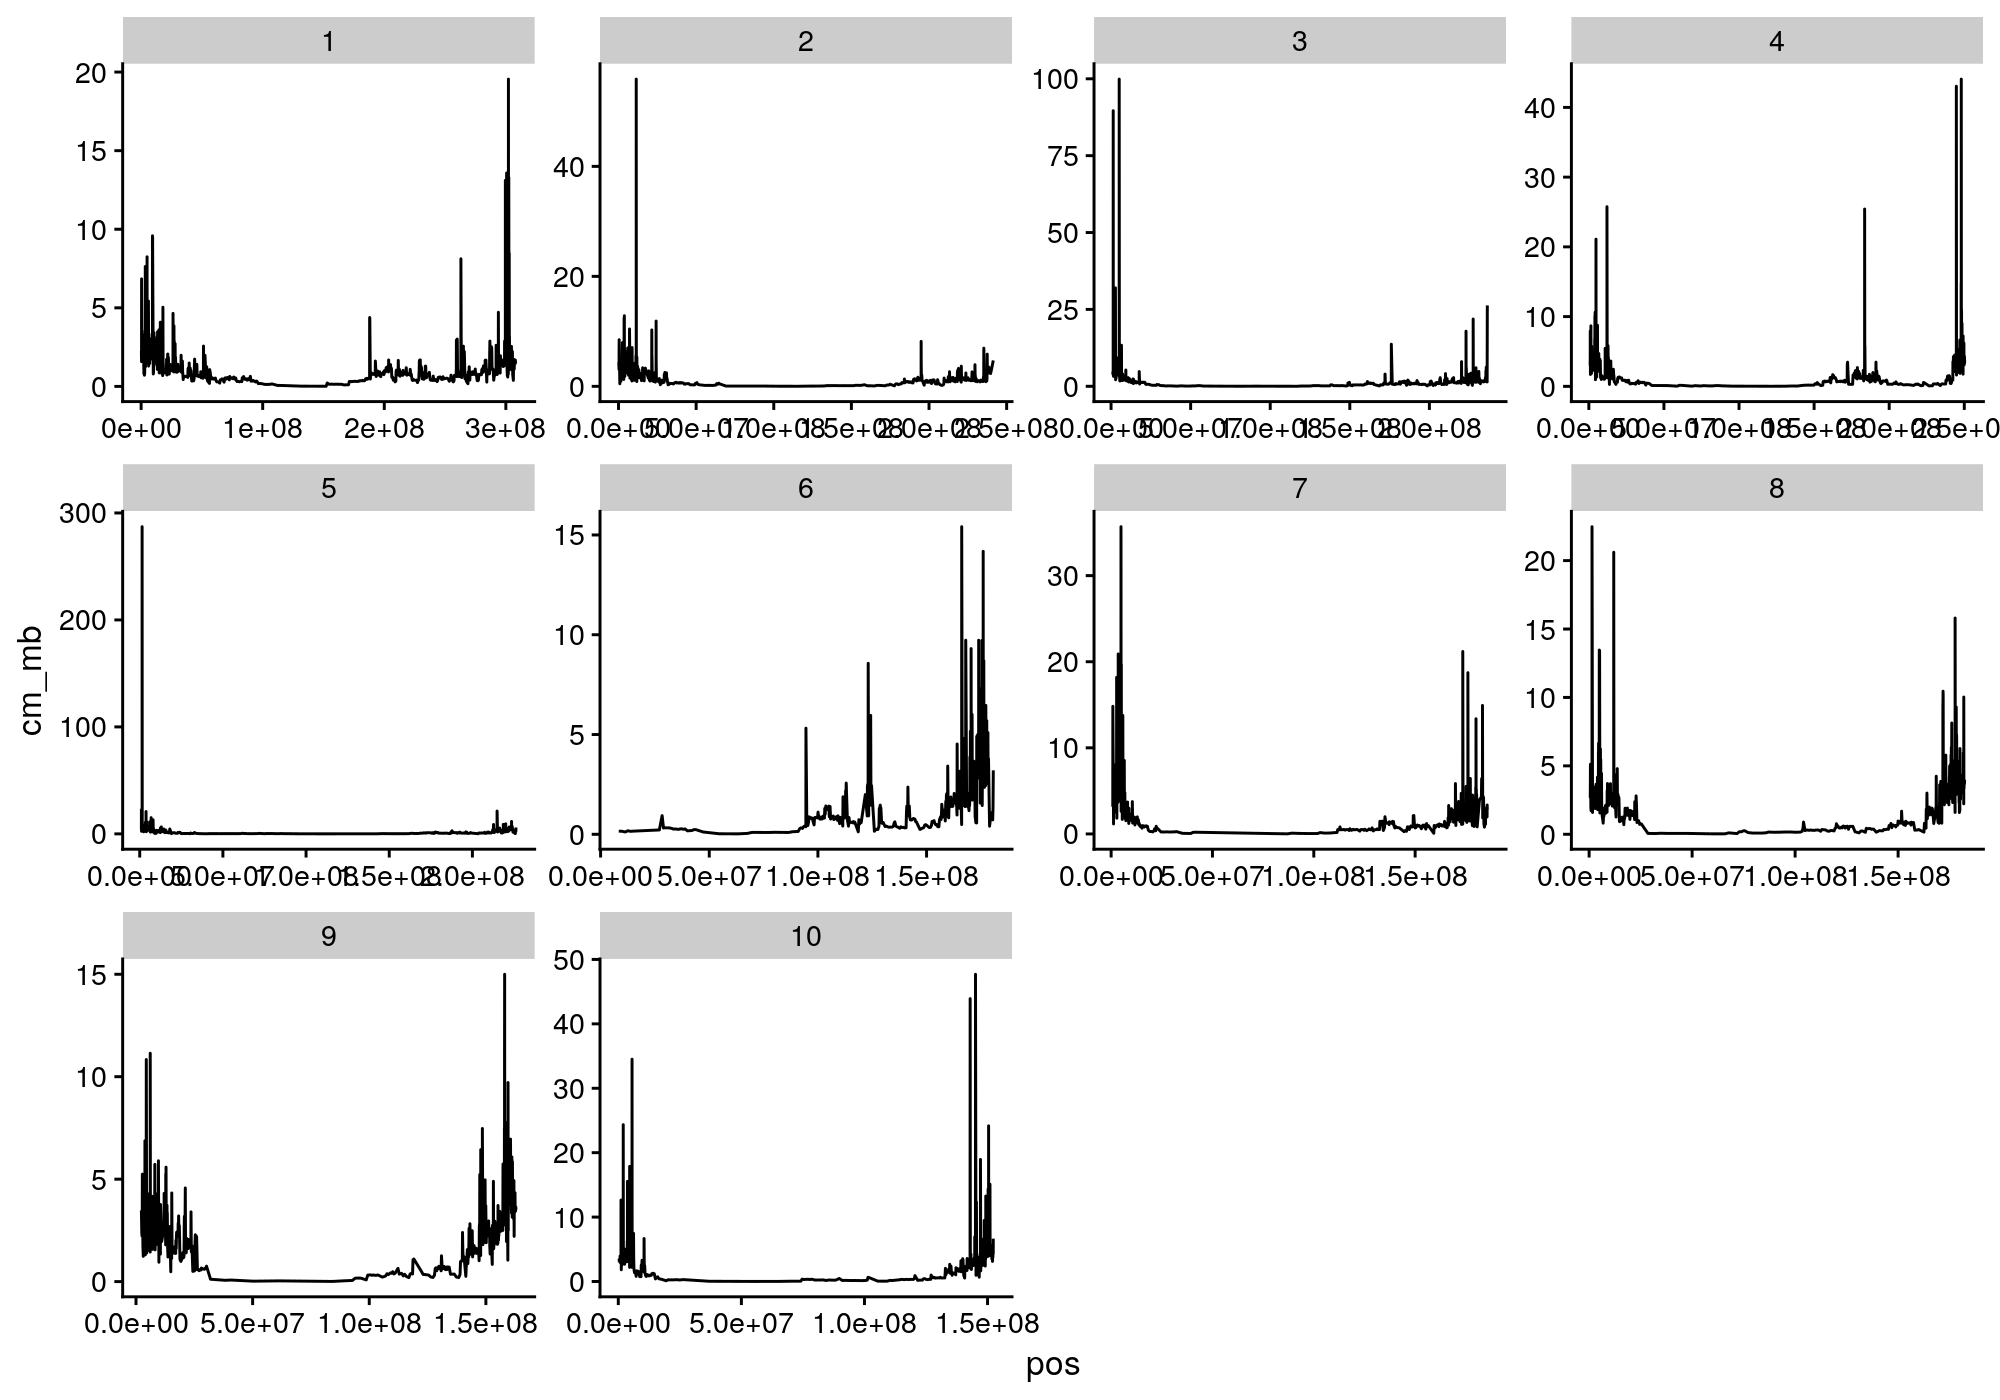

chr,pos,cm,cm_mb
<dbl>,<dbl>,<dbl>,<dbl>
1,214369,-4.6,2.246181
1,341276,-4.4,1.575957
1,370511,-4.2,6.841115
1,532547,-3.8,2.468587
1,603370,-3.6,2.823941
1,694670,-3.4,2.190581


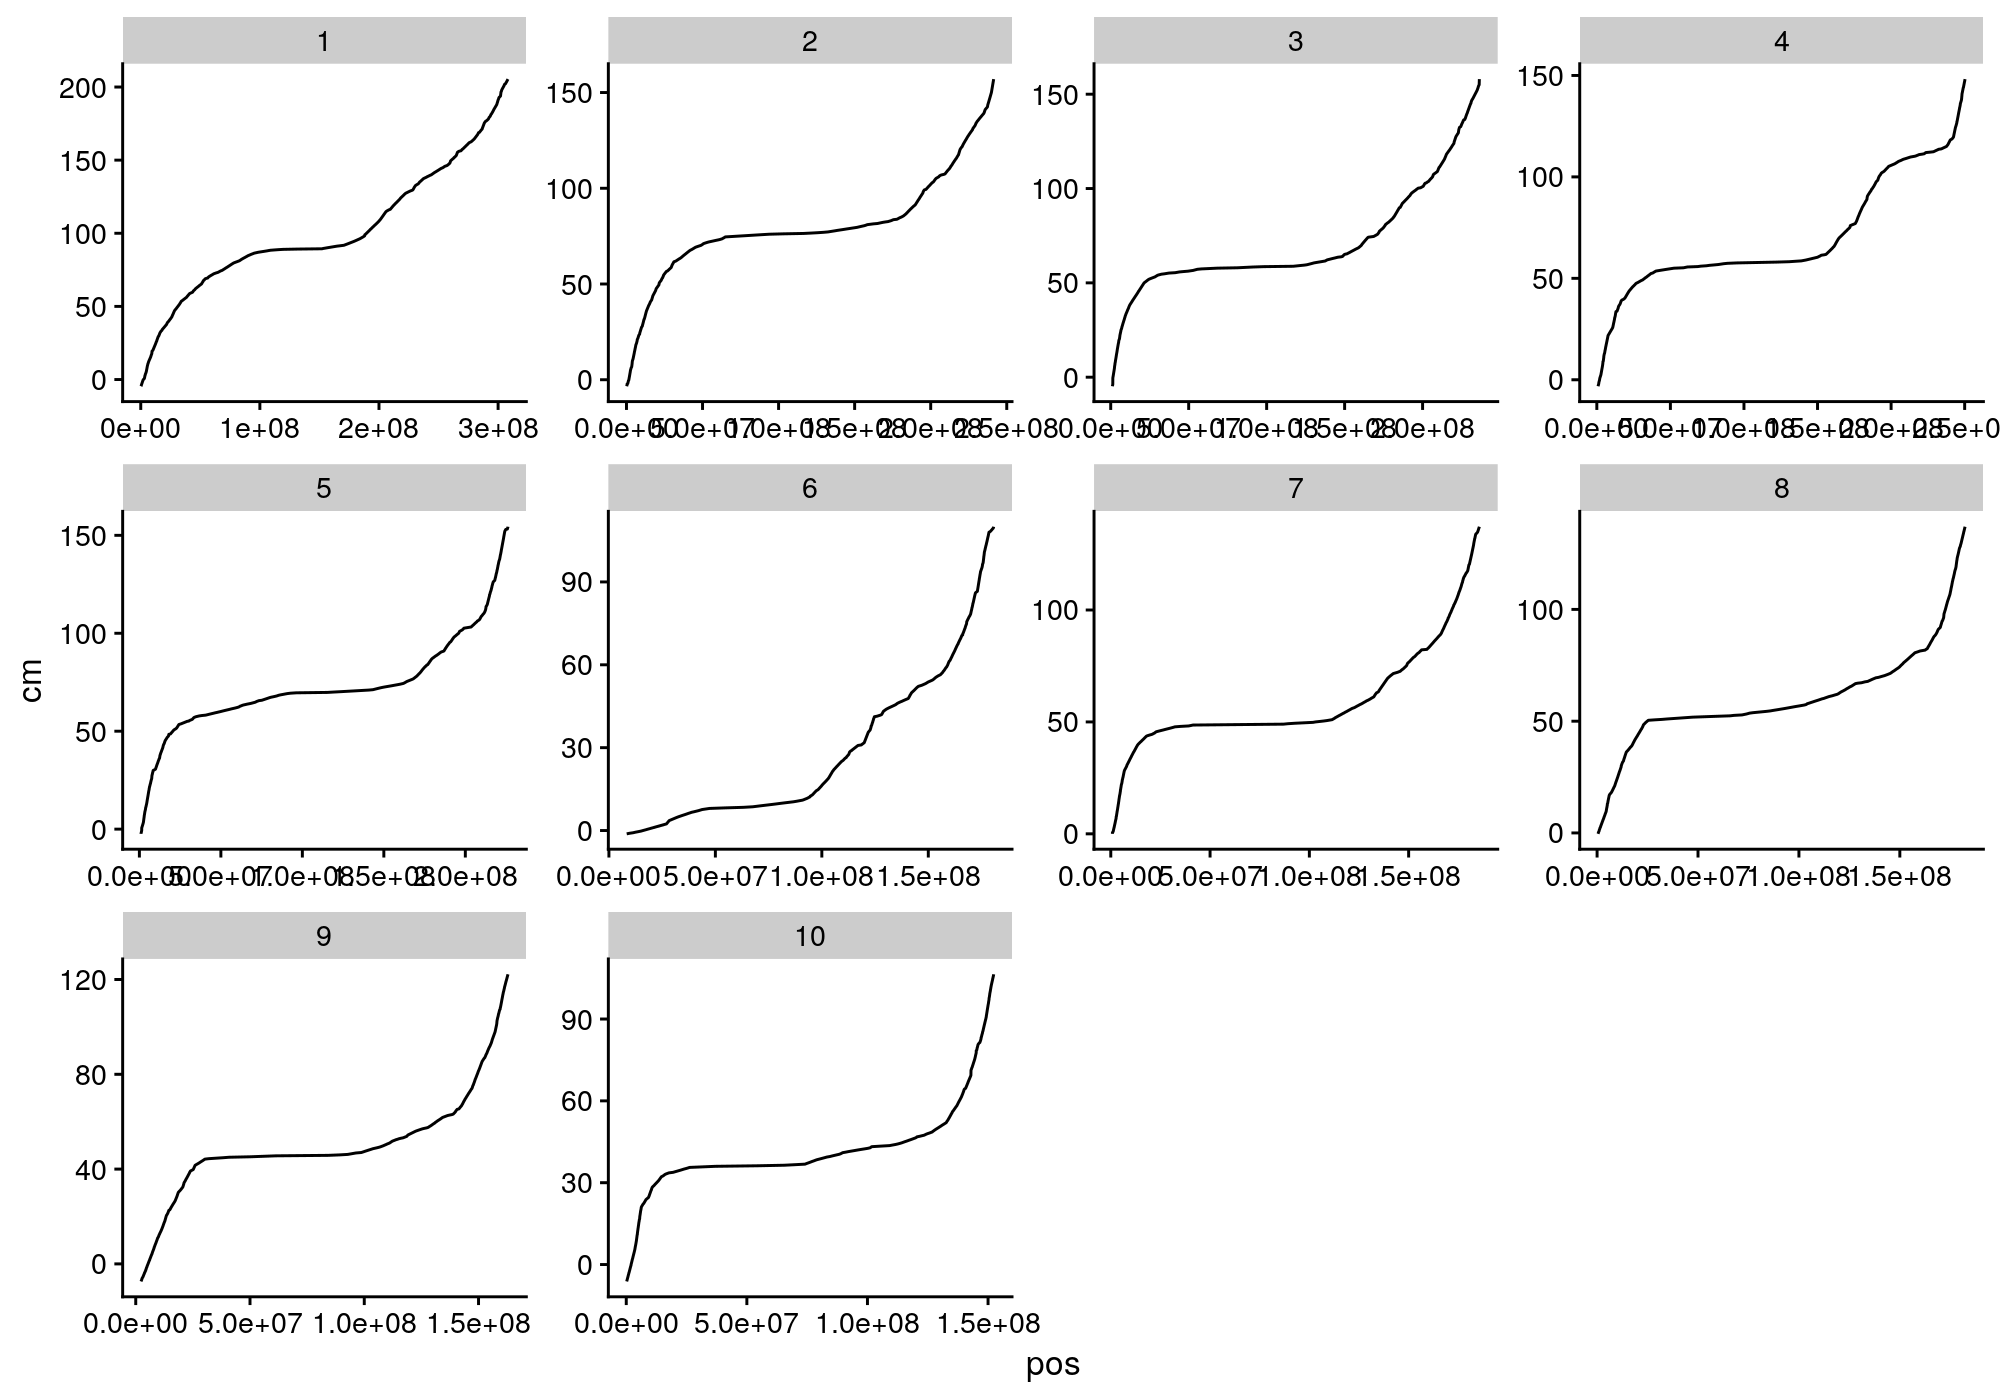

In [41]:
#interpolating phystical - genetic map positions

#switch to approxfun to interpolate

gmap <- read_delim("../data/map/ogut_v5.map.txt", delim = "\t") %>% 
    drop_na() %>%
    group_by(chr) %>% 
    group_modify(~{
        df1 <- slice(.x, -nrow(.x))
        df2 <- slice(.x, -1)
        to_keep <- df2$cm > df1$cm & df2$pos > df1$pos
        df1 <- df1[to_keep, ]
        df2 <- df2[to_keep, ]
        cm_mb <- tibble(cm_mb = 1e6*(df2$cm - df1$cm)/(df2$pos - df1$pos))
        bind_cols(df2, cm_mb)
    })


map_splines <- 
gmap %>% 
    group_by(chr) %>% 
    group_map(~{ 
        pos = .x$pos
        cm = .x$cm
        smooth.spline(pos, cm)
    })

gmap %>% 
ggplot(aes(pos, cm_mb)) +
geom_line()+
facet_wrap(~chr, scales = "free")

gmap %>% 
ggplot(aes(pos, cm)) +
geom_line()+
facet_wrap(~chr, scales = "free")

head(gmap)

In [42]:
#r2_files <- list.files("../data/ibdseq", full.names = TRUE)[grep("r2max0.4.r2.filtered", list.files("../data/ibdseq"))]
#ld_snps <- r2_files %>% map_dbl(~ as.numeric(system(str_glue("wc -l {.x} | cut -d ' ' -f1 "), intern = TRUE)))

hbd_files <- list.files("../data/ibdseq/", full.names = TRUE)[grep("r2max0.7.hbd", list.files("../data/ibdseq/"))]
chrs <- str_extract(hbd_files, "chr([0-9][0-9]*)")
ssp <- str_extract(hbd_files, "(LR|Teo)--(..*)--chr") %>% str_replace("(LR|Teo)--(..*)--chr", "\\1")
pop <- str_extract(hbd_files, "(LR|Teo)--(..*)--chr") %>% str_replace("(LR|Teo)--(..*)--chr", "\\2")
ssp_pop <- str_glue("{ssp}--{pop}")


hbd_df <- seq_along(hbd_files) %>% map_df(~{
    hbd <- read.table(hbd_files[.x], col.names = c("ind1", "hap1idx", "ind2", "hap2idx", "chr", "start", "end", "LOD"))
    chr_num <- as.numeric(str_replace(chrs[.x], "chr", ""))
    if(nrow(hbd) > 0){
    #hbd_lens <- predict(map_splines[[chr_num]], x=c(hbd$end))$y - predict(map_splines[[chr_num]], x=c(hbd$start))$y
    gmap_chr <- filter(gmap, chr == chr_num)
    hbd_lens <- approx(gmap_chr$pos, gmap_chr$cm, xout = hbd$end)$y - approx(gmap_chr$pos, gmap_chr$cm, xout = hbd$start)$y
    ind_freq <- table(c(hbd$ind1, hbd$ind2in))
    tibble(hbd_lens = hbd_lens,
           hbd_sums = cumsum(hbd_lens), 
           chr = chrs[.x], ssp = ssp[.x], pop = pop[.x], ssp_pop = ssp_pop[.x], 
           mean_ind = mean(ind_freq),
           sd_ind = sd(ind_freq),
           min_ind = min(ind_freq),
           max_ind = max(ind_freq),
           LOD = hbd$LOD)
           #ld_snps = ld_snps[.x])
    }
})
head(hbd_df)

hbd_lens,hbd_sums,chr,ssp,pop,ssp_pop,mean_ind,sd_ind,min_ind,max_ind,LOD
<dbl>,<dbl>,<chr>,<chr>,<chr>,<glue>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.017623191,0.01762319,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,3.20
0.008699151,0.02632234,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,4.20
0.023953477,0.05027582,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,3.73
0.010847143,0.06112296,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,3.93
0.021260777,0.08238374,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,4.99
0.002321548,0.08470529,chr1,LR,Amatlan_de_Canas,LR--Amatlan_de_Canas,47.4,20.64623,6,80,4.92


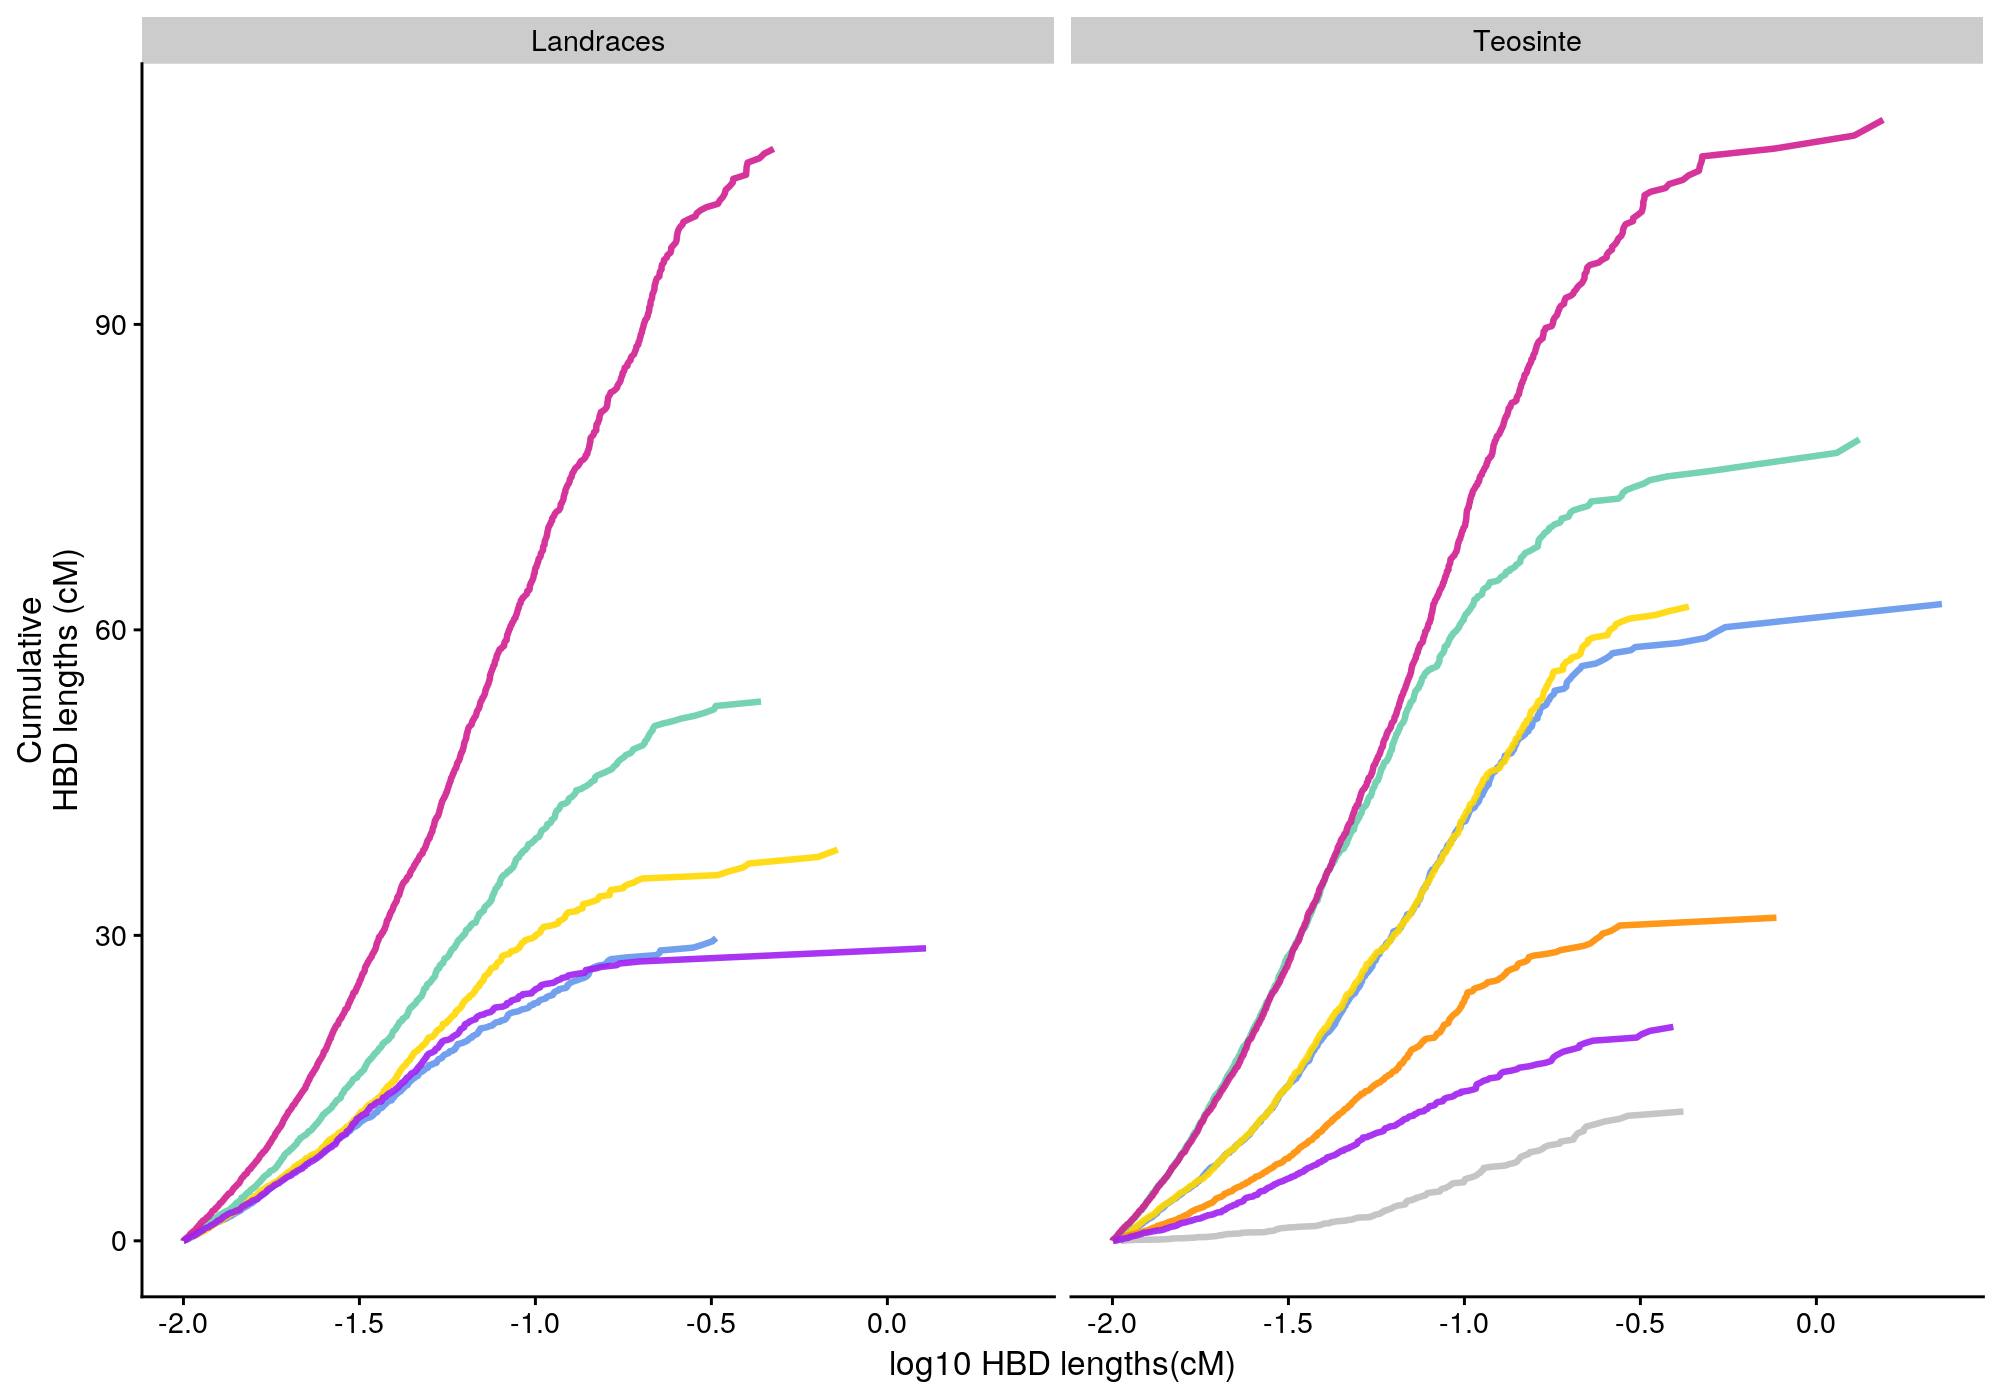

In [43]:
hbd_plot_df <- hbd_df %>% 
    filter(!pop %in% c("Palmar_Chico", "random2_Palmar_Chico")) %>%
    group_by(ssp_pop) %>% 
    filter(hbd_lens > 0.01) %>% 
    #filter(LOD > 5) %>% 
    arrange(hbd_lens) %>% 
    mutate(hbd_sums = cumsum(hbd_lens)) %>% 
    ungroup() %>%     
    full_join(., mutate(color_df, pop = str_replace(pop, "LR_|Teo_", "")), by = "pop") %>% 
    mutate(pop = str_replace_all(pop, "_", " ")) %>% 
    mutate(pop = ifelse(pop == "random", "rangewide", pop)) %>%
    drop_na() 

hbd_plot_label <- 
    hbd_plot_df %>% 
    group_by(ssp_pop) %>% 
    filter(hbd_lens == max(hbd_lens, na.rm = TRUE)) %>% 
    ungroup() %>% 
    distinct()


hbd_plot <- 
hbd_plot_df %>% 
ggplot(aes(log10(hbd_lens), hbd_sums, group = ssp_pop, colour = color)) +
    #ggrepel::geom_label_repel(data = hbd_plot_label, mapping = aes(x = log10(hbd_lens), y = hbd_sums, label = pop), color = "black", size = 2) +
    geom_line(lwd = 1.1, alpha = 0.9) +
    xlab("log10 HBD lengths(cM)") +
    ylab("Cumulative\nHBD lengths (cM)") +
    facet_wrap(~ssp, labeller = labeller(ssp = c("LR" = "Landraces", "Teo" = "Teosinte"))) +
    scale_color_identity()
hbd_plot

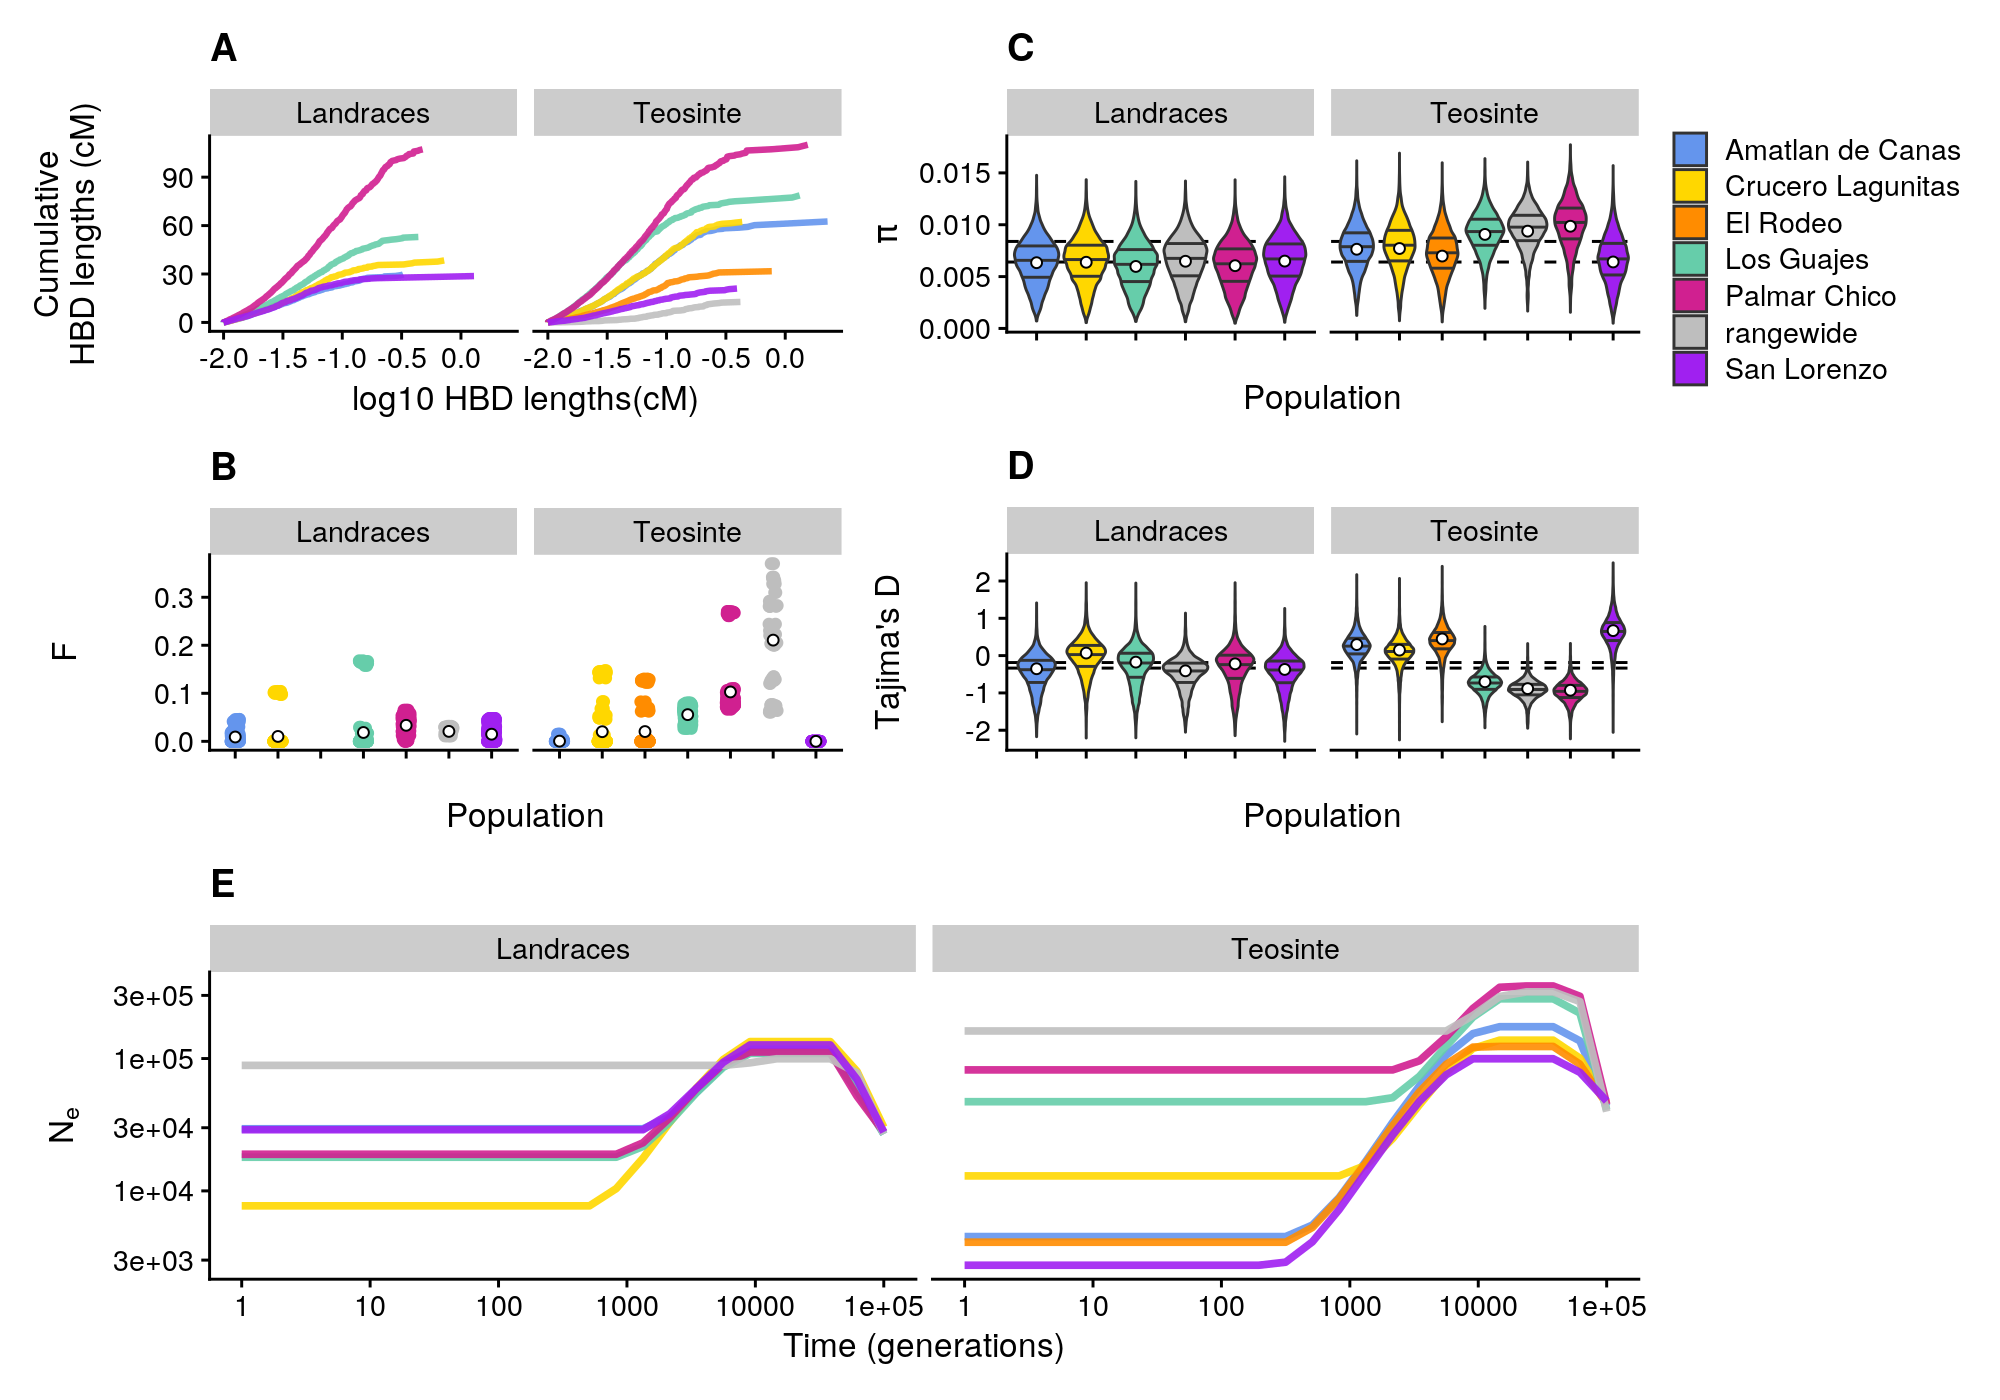

In [46]:
pi_plot  <- piplot + theme(axis.text.x=element_blank())
td_plot  <- tdplot + theme(axis.text.x=element_blank())
relate_plot <- relate_plot + theme(axis.text.x=element_blank())

((hbd_plot + ggtitle("A")) / (relate_plot + ggtitle("B")) | (pi_plot + ggtitle("C")) / (td_plot + ggtitle("D")) ) / (dem_plot + ggtitle("E")) + plot_layout(nrow = 2, heights = c(1,.5))
ggsave("../figures/Figure2.pdf", width = 10, height = 7)


Warning message:
“Removed 989 rows containing non-finite values (stat_boxplot).”


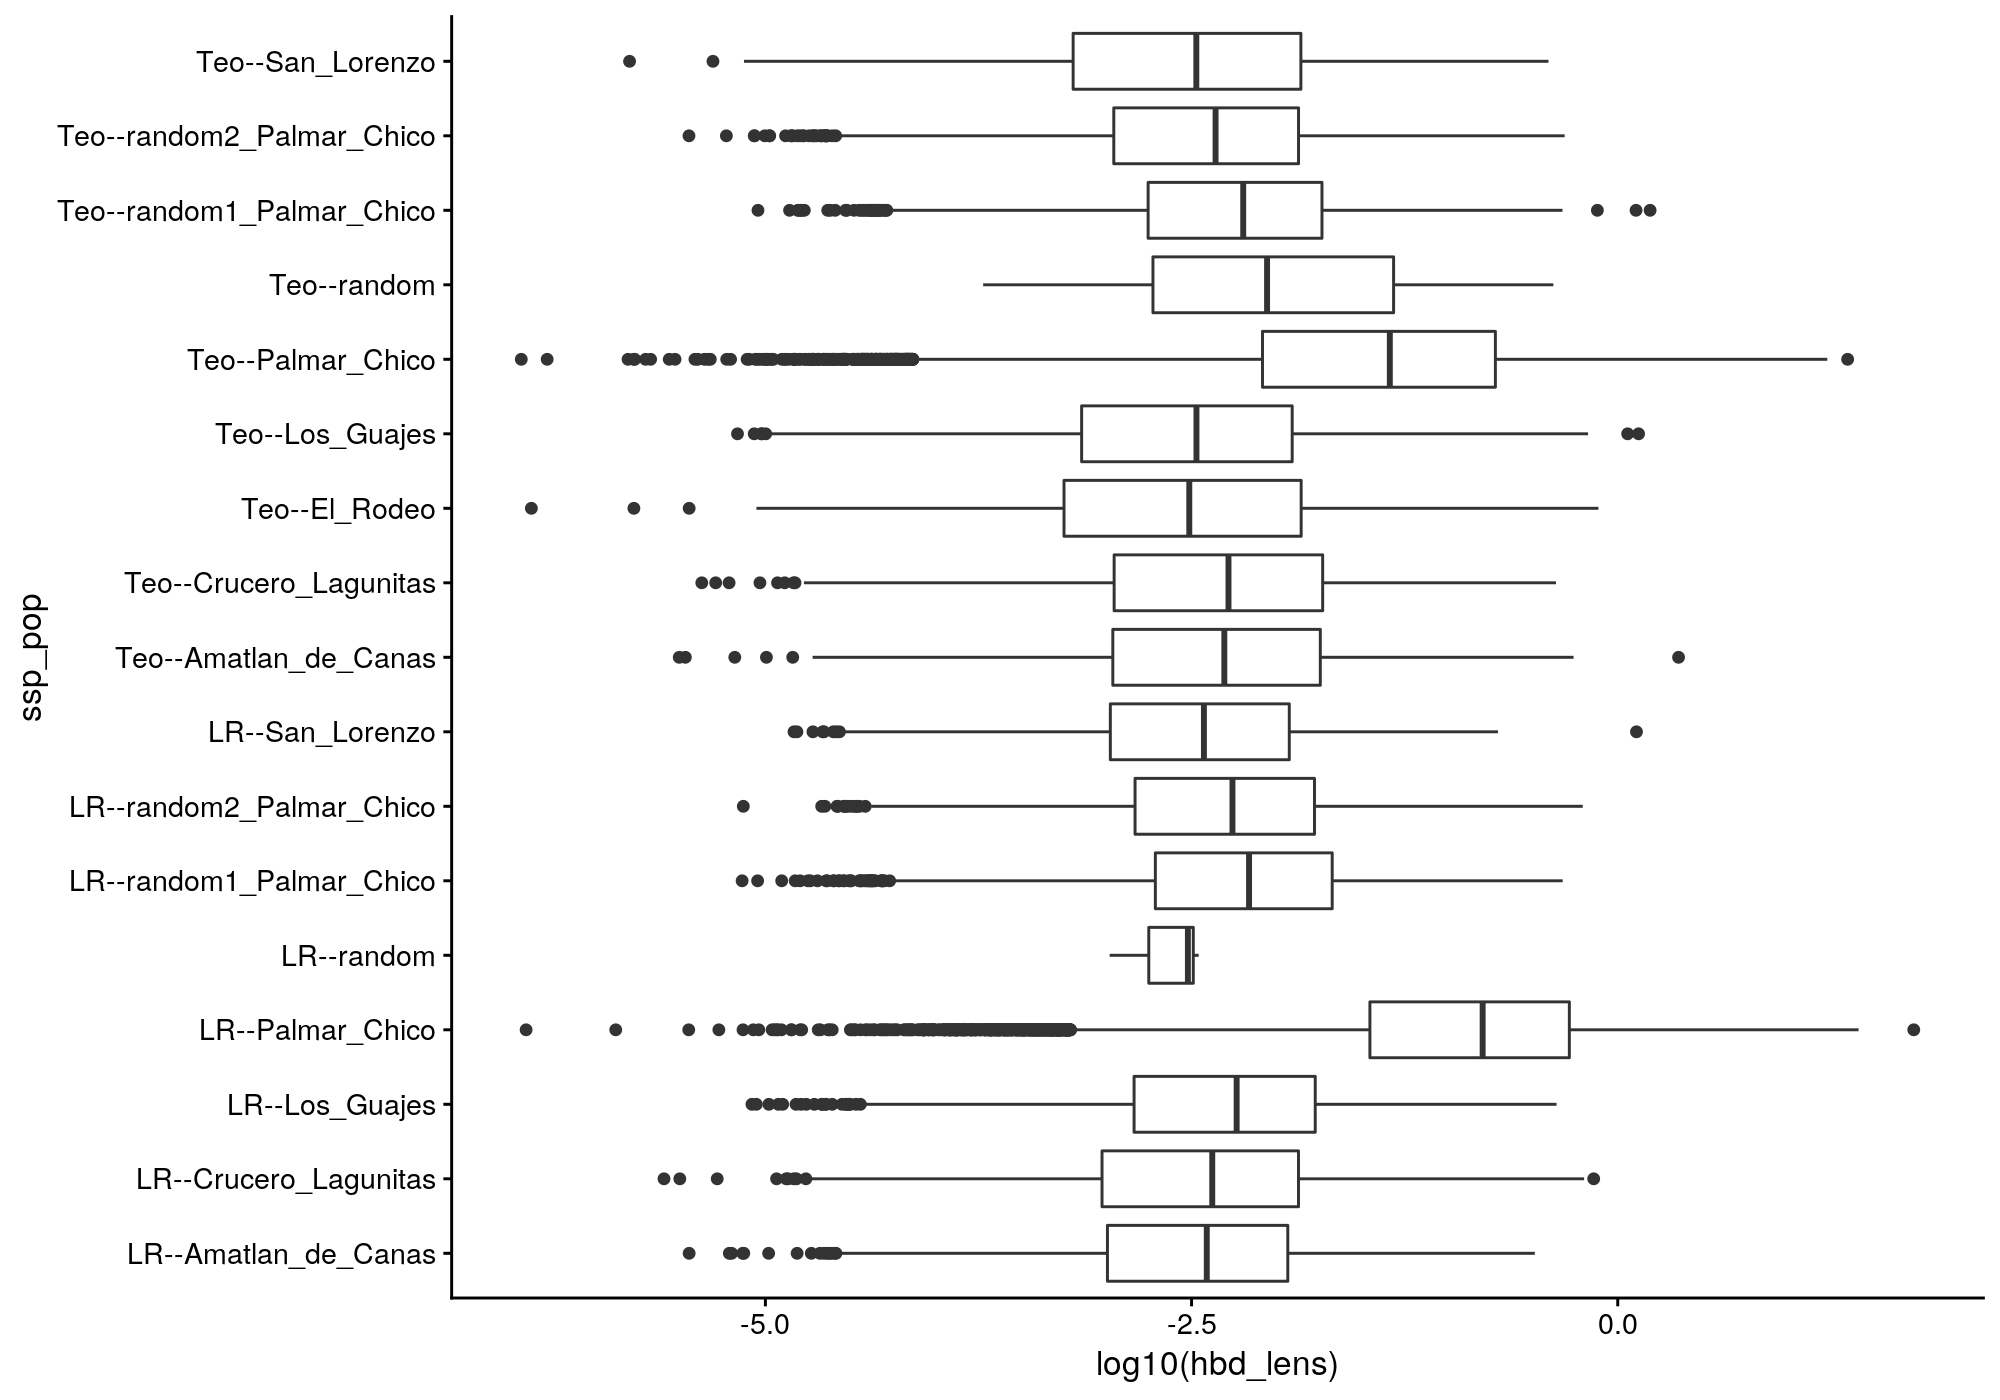

In [35]:
hbd_df %>%
    ggplot(aes(ssp_pop, log10(hbd_lens))) +
    geom_boxplot() +
    coord_flip()

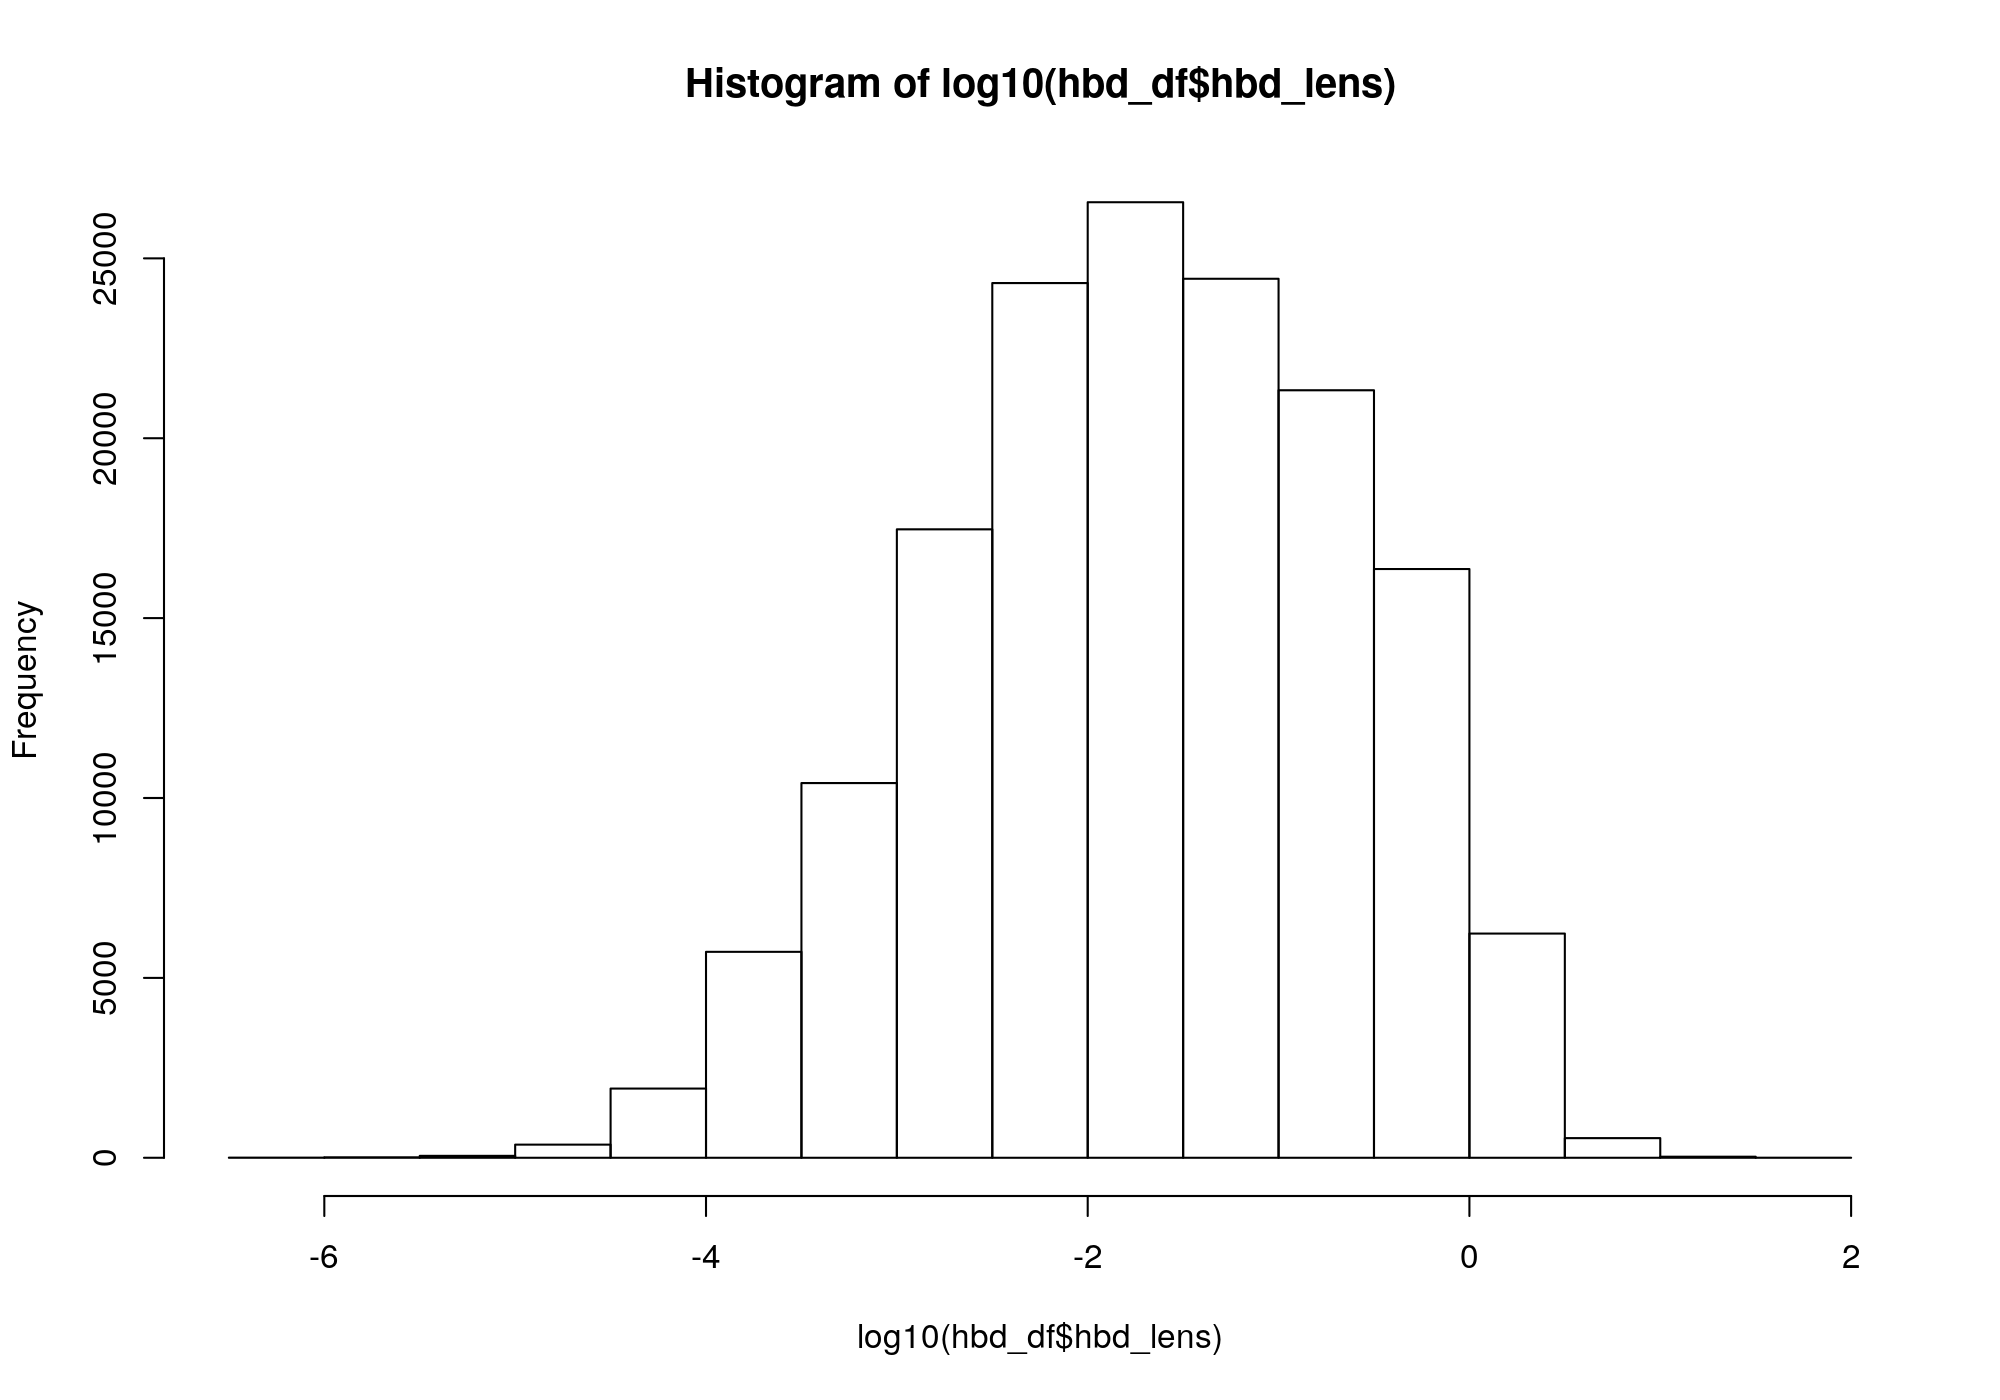

In [36]:
hist(log10(hbd_df$hbd_lens))

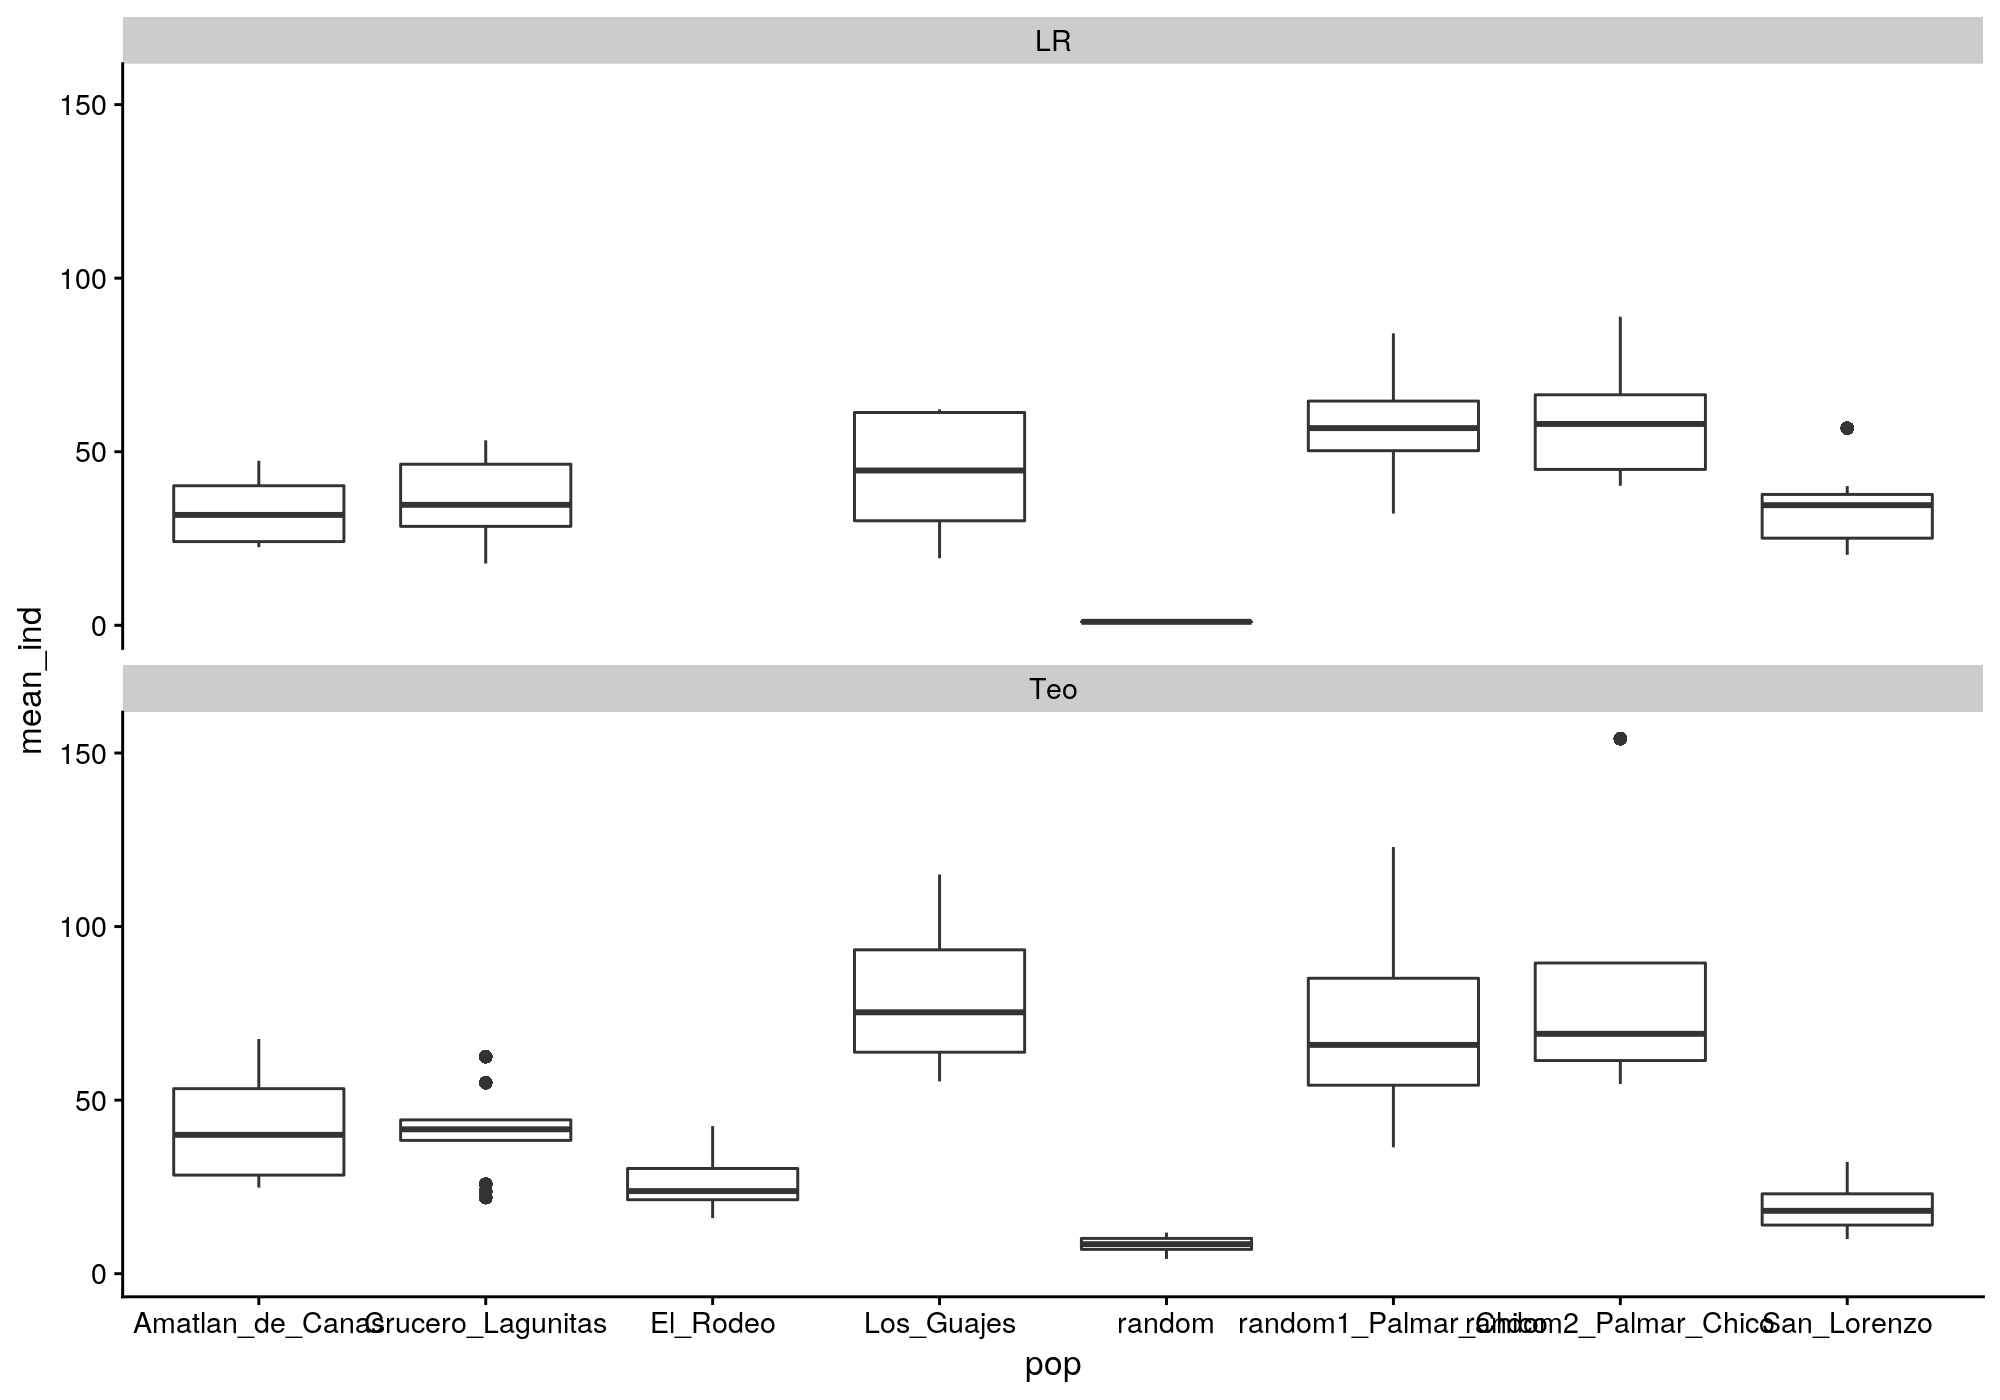

In [37]:
hbd_df %>% 
    filter(pop != "Palmar_Chico") %>% 
    select(-c(hbd_lens, hbd_sums)) %>% 
    distinct() %>% 
    group_by(ssp_pop) %>% 
    ggplot(aes(pop, mean_ind)) +
    geom_boxplot() +
    facet_wrap(~ssp, nrow = 2)

#hbd_df %>% select(ssp_pop, chr, ld_snps) %>% distinct() %>% filter(chr %in% c("chr1", "chr2"))

In [38]:
summary(hbd_df$LOD)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.300   3.750   4.228   4.610  89.900 